<a href="https://colab.research.google.com/github/ukeshbhaal/Task-6-Guvi-5-assignments-/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("/content/car_data.csv")
print(df.head(4))
df.info()
df.Price.describe()
print('Shape = ', df.shape)

print('Missing Values\n',df.isna().sum())
df.describe()

          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  80

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
#TASK 1, Part 1
df_gc = pd.DataFrame(df)

r = linear_model.LinearRegression()
price = df_gc[['Price']]
mileage = df_gc['Mileage']
r.fit(price, mileage)
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(r.coef_[0], r.intercept_))
print('intercept:', r.intercept_)
print('coefficients:', r.coef_)
print('r-squared:', r.score(price, mileage))

Linear Regression Equation: y = -0.1186 * x + 22363.5422
intercept: 22363.54215594064
coefficients: [-0.11861458]
r-squared: 0.020463447323489037


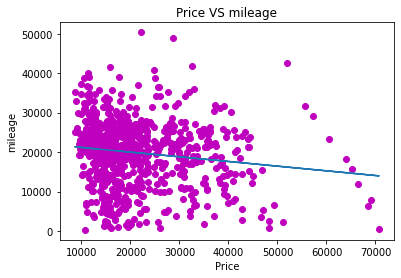

In [ ]:
#TASK2, Part 1
plt.scatter(price, mileage, color='m')
plt.plot(price, r.predict(price))
plt.title('Price VS mileage')
plt.xlabel('Price')
plt.ylabel('mileage')
plt.show()

In [ ]:
#TASK3, Part 1
print('R^2 score for this equation: {:.4f}'
      .format(r.score(price, mileage)))
#0.8 and greater is considered a strong correlation.
#If less than 0.8 means it is not,So 0.0205 is less than 0.8

R^2 score for this equation: 0.0205


Tasks, Part 2
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Find the combination of the factors that is the best predictor for price.

In [ ]:
# Task1 , Part 2

s=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
s1=df[s]
s2=df["Price"]
#print(s1,s2)
r = linear_model.LinearRegression()
r.fit(s1,s2)
print('intercept:', r.intercept_)
print('coefficients:', r.coef_)


#Task2 part 2 - R-squared
print('r-squared: ', r.score(s1,s2))
#0.8 and greater is considered a strong correlation.
#If less than 0.8 means it is not,So 0.44 is less than 0.8

intercept: 6758.755143598106
coefficients: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
r-squared:  0.4462643536728379


In [ ]:
# Task1 , Part 2

df
s = ["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
df11=pd.DataFrame(df)
re = linear_model.LinearRegression()
def l(s,dfs):
  s1=dfs[s]
  sa=dfs['Price']
  re.fit(s1,sa)
  print('The equation for columns {} with respect to Price:\n'
          '{} + {}'.format(s, re.coef_, re.intercept_))
l(s,df)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to Price:
[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106


     Feature  Unique
0      Price     798
1    Mileage     791
2       Make       6
3      Model      32
4       Trim      47
5       Type       5
6   Cylinder       3
7      Liter      16
8      Doors       2
9     Cruise       2
10     Sound       2
11   Leather       2


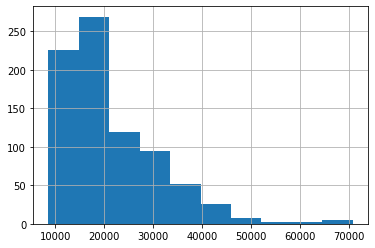

In [ ]:
temp = pd.DataFrame([[col,len(df[col].unique())] for col in df.columns])
temp.columns = ['Feature', 'Unique']
print(temp)
df['Price'].hist()


# Most car price at 20000

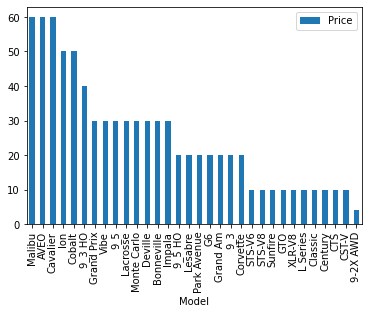

In [ ]:
def plot_bar(data, column):
    temp = pd.DataFrame(data.groupby(column).count()['Price']).sort_values(by='Price', ascending=False)    
    temp.plot.bar()
plot_bar(df,'Model')    

# Most car model is Malibu, AVEO, Cavalier

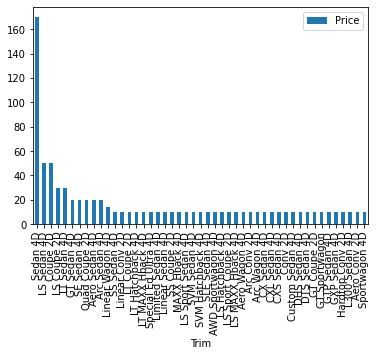

In [ ]:
T=plot_bar(df,'Trim')

Most Car Trim is "Sedan 4D"

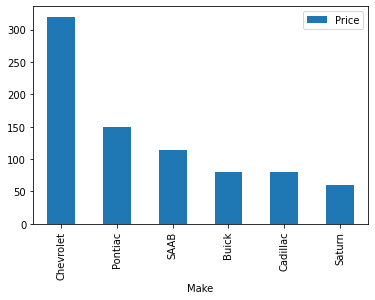

In [ ]:
plot_bar(df,'Make')

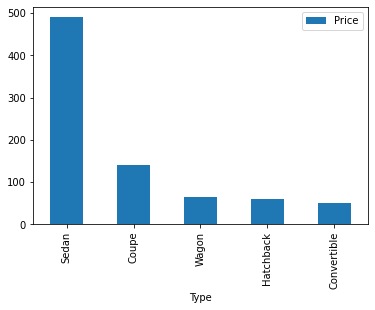

In [ ]:
plot_bar(df,'Type')

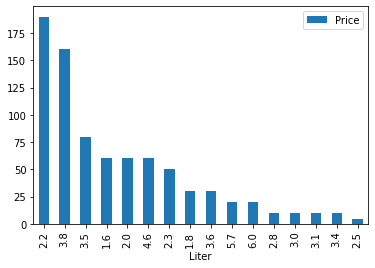

In [ ]:
plot_bar(df,'Liter')

          Price  Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
Price     100.0    -14.0      57.0   56.0  -14.0    43.0  -12.0     16.0
Mileage   -14.0    100.0      -3.0   -2.0   -2.0     3.0   -3.0      0.0
Cylinder   57.0     -3.0     100.0   96.0    0.0    35.0   -9.0      8.0
Liter      56.0     -2.0      96.0  100.0   -8.0    38.0   -7.0      9.0
Doors     -14.0     -2.0       0.0   -8.0  100.0    -5.0   -6.0     -6.0
Cruise     43.0      3.0      35.0   38.0   -5.0   100.0   -9.0     -7.0
Sound     -12.0     -3.0      -9.0   -7.0   -6.0    -9.0  100.0     17.0
Leather    16.0      0.0       8.0    9.0   -6.0    -7.0   17.0    100.0


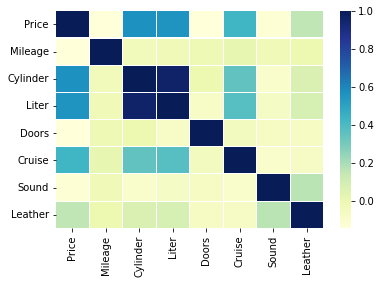

In [ ]:
print(round(df.corr()*100))

sns.heatmap(df.corr(), cmap="YlGnBu", linewidth=0.1)

Cylinder and Liter is highly correlated (positively). Thus, either one of the features can be dropped.

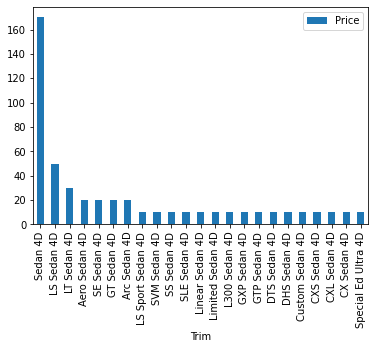

In [ ]:
#since Sedan seems to be the most preferred car.

temp_df = df[df.Type=='Sedan']
plot_bar(temp_df,'Trim')
temp_df = temp_df[temp_df.Trim=='Sedan 4D']

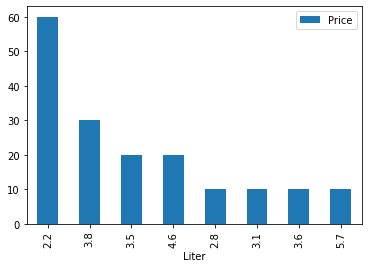

In [ ]:
plot_bar(temp_df, 'Liter')
temp_df = temp_df.query('Liter==2.2 or Liter==3.8')

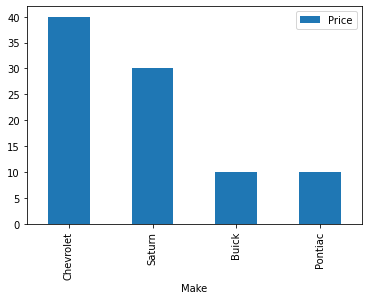

In [ ]:
plot_bar(temp_df, 'Make')

Chevloret and Saturn is of 2.2 liters and Buick and Pontiac is of 3.8 liters
Both Buick and Pontiac have higher preference over Saturn, when Trim is less important to consumers. Therefore, more features does not imply an increase in sales.
The cars with more features seems to have lower fuel capacity.

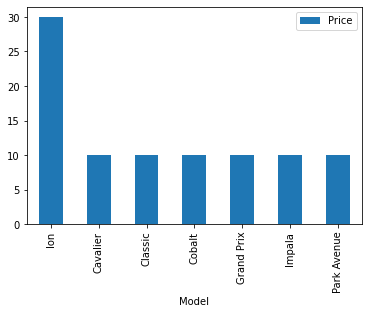

In [ ]:
plot_bar(temp_df, 'Model')


The most popular type of car is Sedan and the most popular model is Ion.
Remaining models seems to have almost similar sales figure. Therefore, sales revenue is required to gain more insights.


In [ ]:
# Remove Co-Related Columns
#: Cylinder and Liter is highly correlated (positively). Thus, either one of the features can be dropped.
df.drop(columns = ['Liter'], axis=1, inplace= True)
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0


In [ ]:
#Save Categorical and Continuous Variables
#Identifying categorical variables helps to create dummy variables, i.e. via One-Hot Encoding.

cat_var = ['Make','Model','Type','Cylinder','Doors','Cruise','Sound','Leather','Trim']
con_var = list(set(df.columns) - set(cat_var))

print('Categorical Variables\n',cat_var,'\n\n',
      'Continuous Variables\n', con_var)

Categorical Variables
 ['Make', 'Model', 'Type', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather', 'Trim'] 

 Continuous Variables
 ['Mileage', 'Price']


In [ ]:
#Create dummy columns for categorical variables.

df = pd.get_dummies(df, columns = cat_var, drop_first = True)
df.head(3)

,Price,Mileage,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.103129,8221,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.036083,9135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.847862,13196,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Predictive Modelling
3.1. Dependent and Independent Variable

Prediction Distribution for Training Data



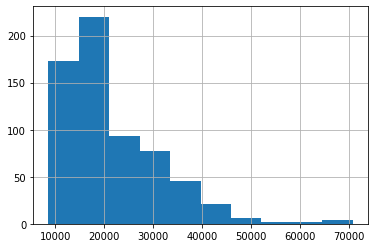

In [ ]:
# Get Training and Testing Data
X, y = df.iloc[:,1:], df.iloc[:,0]
#Split Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)
#Check the Distribution of Prediction for Training and Testing data
print('Prediction Distribution for Training Data\n')
y_train.hist()

Prediction Distribution for Testing Data



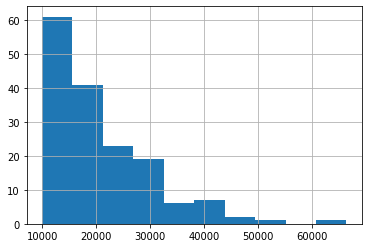

In [ ]:
print('Prediction Distribution for Testing Data\n')
y_test.hist()

Model Training using Linear Regression

In [ ]:
#Model Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression Model\n',lr)
y_pred = lr.predict(X_test)
print('Model Prediction\n',y_pred[:5])

Linear Regression Model
 LinearRegression()
Model Prediction
 [24727.66563956 16257.13554058 12166.94027325 17103.49230132
 10957.01975434]


In [ ]:
from sklearn.metrics import r2_score
print('Model Performance =',round(r2_score(y_test, y_pred)*100,2),'%')

Model Performance = 98.8 %


Model Training using Decision Tree
(Depth = 5)
Model Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state = 7)
dt.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=7)

In [ ]:
y_pred = dt.predict(X_test)
print('Model Prediction\n',y_pred[:5])

Model Prediction
 [23956.9953498  15911.32064578 13451.74951893 18821.17067077
 13451.74951893]


In [ ]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=10, random_state = 7)
dt.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=7)

In [ ]:
y_pred = dt.predict(X_test)
print('Model Prediction\n',y_pred[:5])

from sklearn.metrics import r2_score
print('Model Performance =',round(r2_score(y_test, y_pred)*100,2),'%')

Model Prediction
 [26060.33534956 17325.26954296 12350.37155611 18246.91768738
 12350.37155611]
Model Performance = 97.87 %


Prediction accuracy is more in Linear Regression.

